## Decision Tree With Python

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.
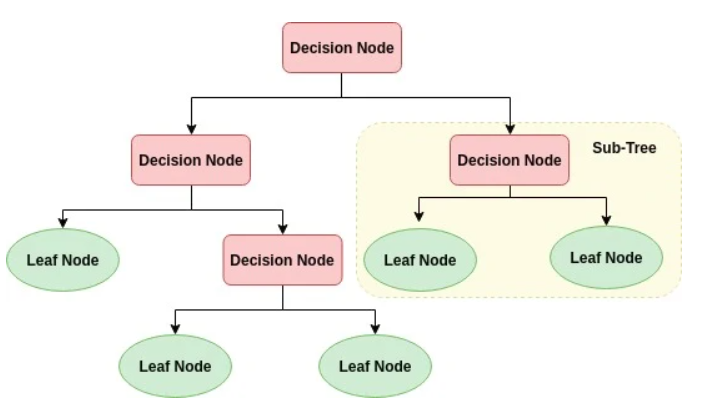

### Decision Tree Algorithm

The basic idea behind any decision tree algorithm is as follows:

- Select the best attribute using **attribute selection measures** to split the records.
- Make that attribute a decision node and breaks the dataset into smaller subsets.
- Starts tree building by repeating this process recursively for each child until one of the condition will match:
  - All the tuples belong to the same attribute value.
  - There are no more remaining attributes.
  - There are no more instances.

### Decision Tree Classifier Building in Scikit-learn

First, load the required libraries.
- ``DecisionTreeClassifier`` from ``sklearn.tree`` is a class capable of performing multi-class classification on a dataset.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [2]:
# import iris dataset.
iris = load_iris()
X = iris.data
y = iris.target
X.shape,y.shape,iris.feature_names, iris.target_names

((150, 4),
 (150,),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [3]:
# train_test_split -- a function used to split dataset in sklearn.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # 80% training and 20% test

Let's create a Decision Tree Model using Scikit-learn.

In [4]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

``scikit-learn`` uses an optimised version of the CART algorithm, which constructs binary trees using the feature and threshold that yield the largest information gain or Gini impurity reduction at each node.

Once trained, you can plot the tree with the plot_tree function:

[Text(558.0, 978.48, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]\nclass = versicolor'),
 Text(418.5, 761.0400000000001, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(697.5, 761.0400000000001, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 84\nvalue = [0, 42, 42]\nclass = versicolor'),
 Text(279.0, 543.6, 'petal length (cm) <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]\nclass = versicolor'),
 Text(139.5, 326.1600000000001, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = versicolor'),
 Text(418.5, 326.1600000000001, 'petal width (cm) <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(279.0, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(558.0, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(1116.0, 543.6, 'petal length (cm) <= 4.85\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = virg

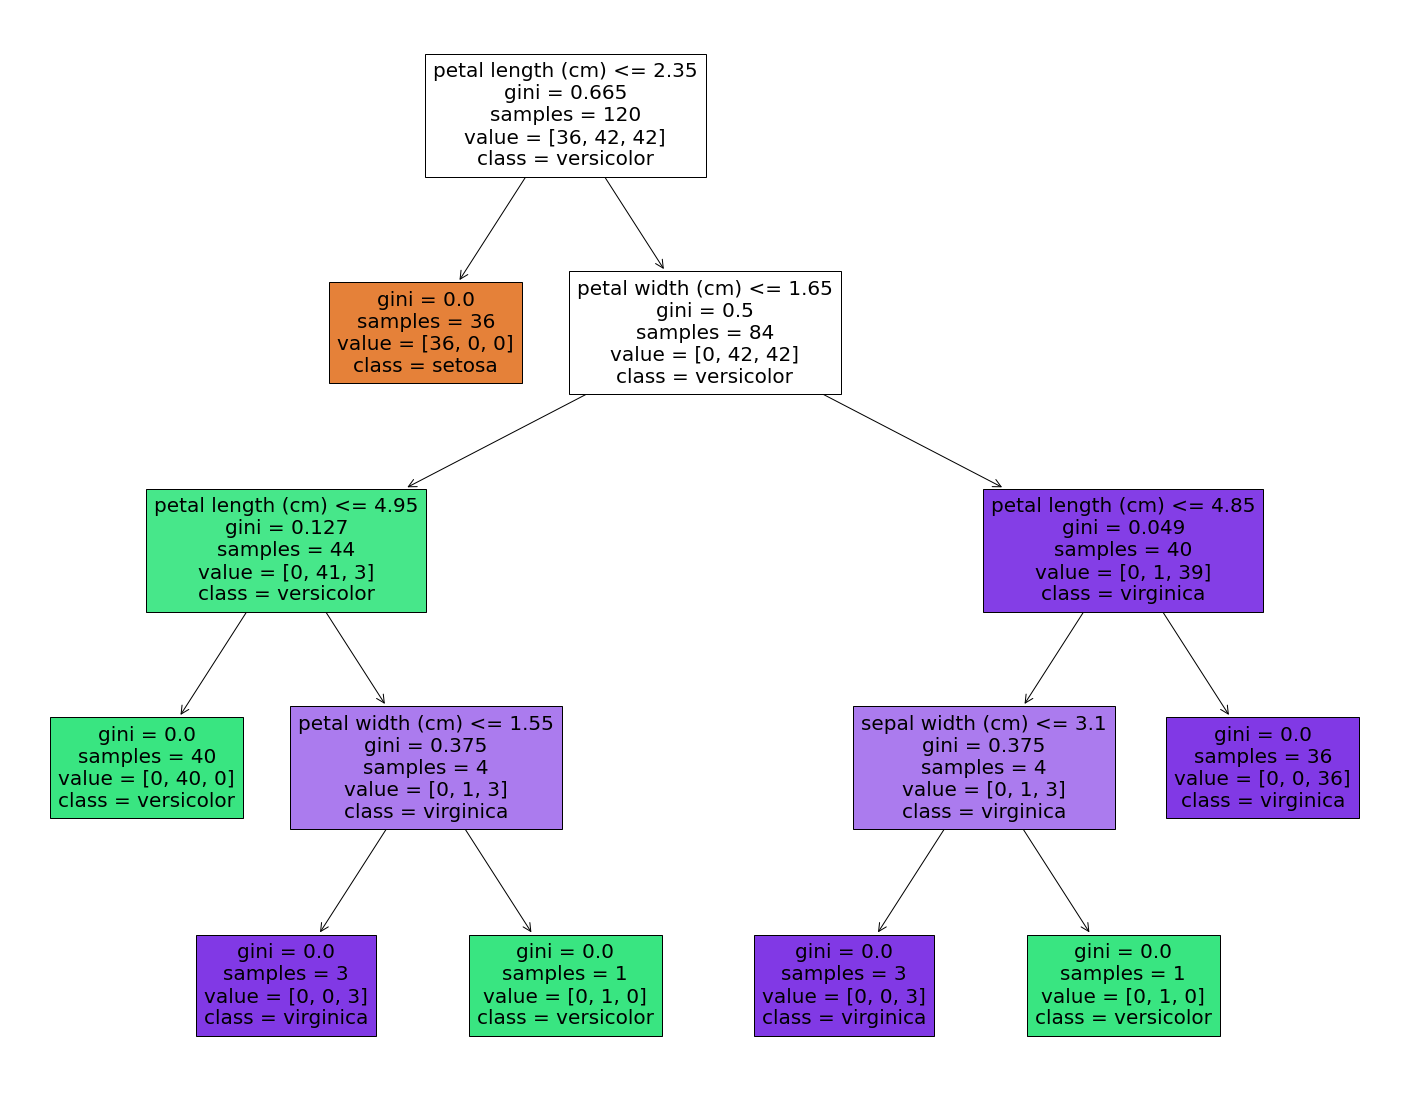

In [5]:
# DT visualization.
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [6]:
# save the image.
fig.savefig("decistion_tree.png")

Let's estimate, how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores = metrics.precision_recall_fscore_support(y_test, y_pred, average = 'macro')

#print confusion matrix and macro-average of precision, recall, f1-score
print(confusion_matrix(y_test,y_pred))
print("Precision: %s; Recall: %s; F1-Score: %s" % (scores[0],scores[1],scores[2]))

Accuracy: 0.9333333333333333
[[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]
Precision: 0.9166666666666666,Recall: 0.9166666666666666; F1-Score: 0.9166666666666666


### Optimizing Performance

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as ``entropy`` (by default its ``gini``).

In [8]:
# Create Decision Tree classifer object.
# and using pre-pruning technique by set max_depth.
clf1 = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test)

[Text(523.125, 951.3000000000001, 'petal width (cm) <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [36, 42, 42]\nclass = versicolor'),
 Text(348.75, 679.5, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(697.5, 679.5, 'petal width (cm) <= 1.65\nentropy = 1.0\nsamples = 84\nvalue = [0, 42, 42]\nclass = versicolor'),
 Text(348.75, 407.70000000000005, 'petal length (cm) <= 4.95\nentropy = 0.359\nsamples = 44\nvalue = [0, 41, 3]\nclass = versicolor'),
 Text(174.375, 135.89999999999998, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = versicolor'),
 Text(523.125, 135.89999999999998, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(1046.25, 407.70000000000005, 'petal length (cm) <= 4.85\nentropy = 0.169\nsamples = 40\nvalue = [0, 1, 39]\nclass = virginica'),
 Text(871.875, 135.89999999999998, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(1220.625, 135.89999999999998, 'entropy = 0.0\nsamples = 36\nv

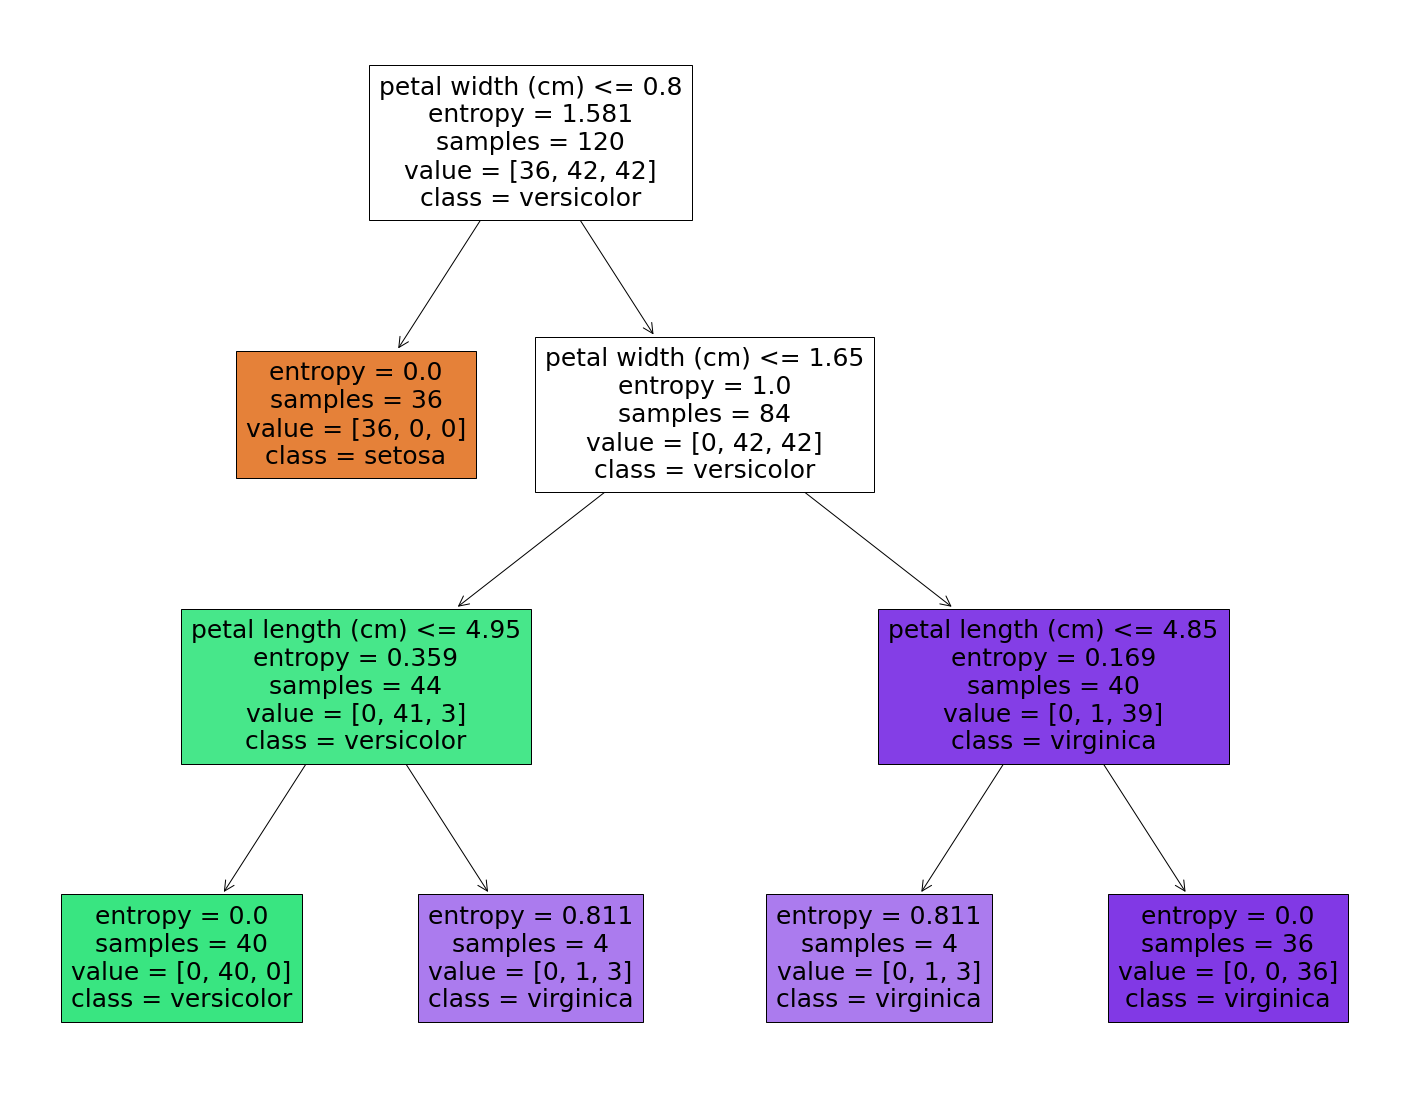

In [9]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf1, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In some scenario, we may have multiple confusion matrices
- perform multiple training/test
- training/test on multiple datasets
- **multiclass classification**
then, we need to combine the per-case precision/recall/F1-scores into a single number, to have the classifier's overall performance. There are a few ways of doing this.

- Macro average: Get the precision and recall of each confusion matrix, $(𝑃_1,𝑅_1 ),(𝑃_2,𝑅_2 ),…,(𝑃_n,𝑅_n)$, use the  arithmetic mean of the per-case scores.  
    - 𝑚𝑎𝑐𝑟𝑜-𝑃=$\frac{1}{n}\sum\_{i=1}^n P_i$ 
    - 𝑚𝑎𝑐𝑟𝑜-𝑅=$\frac{1}{n} \sum_{i=1}^n R_i $
    - 𝑚𝑎𝑐𝑟𝑜-𝐹1=$2∙\frac{𝑚𝑎𝑐𝑟𝑜-𝑃×𝑚𝑎𝑐𝑟𝑜−𝑅}{𝑚𝑎𝑐𝑟𝑜−𝑃+𝑚𝑎𝑐𝑟𝑜−𝑅}$
- Micro average: Get the average of individual true positives (TP), false positives (FP), and false negatives (FN) of the system for different sets and the apply them to get the statistics.

In [10]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred1, average = 'macro')
print(confusion_matrix(y_test,y_pred1))
print("Precision: %s,Recall: %s; F1-Score: %s" % (scores1[0],scores1[1],scores1[2]))

Accuracy: 0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
Precision: 0.9629629629629629,Recall: 0.9583333333333334; F1-Score: 0.9581699346405229


For more information, refer to the document of scikit-learn about [decision tree](https://scikit-learn.org/stable/modules/tree.html) modules.